In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
#import tensorflow as tf
%matplotlib inline

In [129]:
def plot_features(folder,which=1,xlim=[0,4000],ylim=[0,100]):
    # lad
    crystals = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*crystals*'))[which])
    aliens = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*alien_col*'))[which])
    asteroids = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*asteroid*'))[which])
    exploration = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*explorations*'))[which])
    lrs = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*lrs*'))[which])

    # put into df
    df = pd.DataFrame(data=np.vstack((crystals,asteroids,aliens)).T,columns=['crystals','asteroids','aliens'])

    sns.set_style("whitegrid")
    # plot 
    df['crystals'].rolling(window=5).mean().plot(figsize=(12,4))
    ax = plt.gca()
    ax.set_title('crystals')
    sns.despine()
    ax.set_xlabel('episodes')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    df[['aliens','asteroids']].rolling(window=5).mean().plot(figsize=(12,4))
    ax = plt.gca()
    ax.set_title('asteroids and aliens')
    sns.despine()
    ax.set_xlabel('episodes')
    ax.set_xlim(xlim)
    

    out={}
    out['exploration']=exploration
    out['crystals']=crystals
    out['asteroids']=asteroids
    return(out)


### 'cq_gr_truth1/'
- network with 3 conv layers and 1 fully connected layer before 5 unit output. 
- gt_reward = np.array([2.0,-2.0,-1.0])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                  obs_type=3,relative_window=(25,25),
                 reward_func=reward_func)
  
- started at 4pm and got to 80,000 time steps by 6pm. So it's quite slow, but it is working.. 

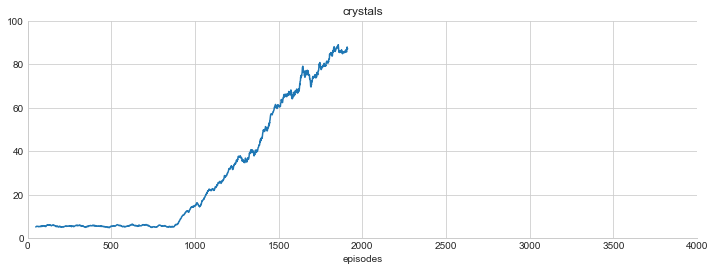

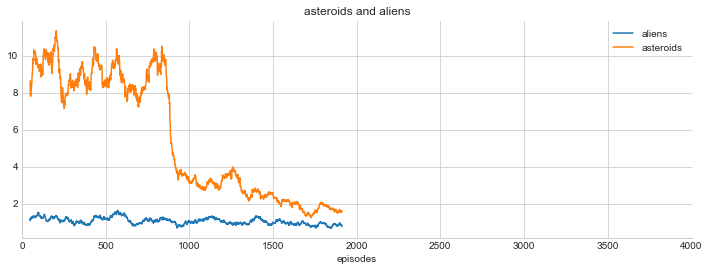

In [3]:
folder = 'cq_gr_truth1'
out = plot_features(folder,which=0)

In [9]:
# LOADS Model to inspect 
# sess = tf.Session()
# saver = tf.train.import_meta_graph(sorted(glob.glob('../dqn/'+folder+'/gym/*weights*meta*'))[0])
# saver.restore(sess,tf.train.latest_checkpoint('../dqn/'+folder+'/gym/'))
# graph = tf.get_default_graph()
# graph.get_collection('model_variables')

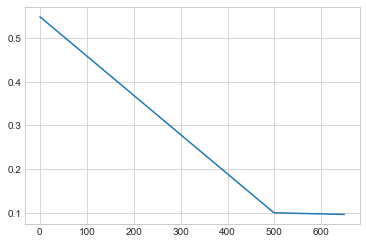

In [159]:
plt.plot(out['exploration'])
# hard to know how many episodes this is... it's 600 time points.

               
                 
### 'cq_gr_truth2/'
- positive points for running into asteroid (really silly check)
- gt_reward = np.array([2.0,-2.0,1.0])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                  obs_type=3,relative_window=(25,25),
                 reward_func=reward_func)

{'exploration': array([ 0.5491,  0.5482,  0.5473,  0.5464,  0.5455,  0.5446,  0.5437,
         0.5428,  0.5419,  0.541 ,  0.5401,  0.5392,  0.5383,  0.5374,
         0.5365,  0.5356,  0.5347,  0.5338,  0.5329,  0.532 ,  0.5311,
         0.5302,  0.5293,  0.5284,  0.5275,  0.5266,  0.5257,  0.5248,
         0.5239,  0.523 ,  0.5221,  0.5212,  0.5203,  0.5194,  0.5185,
         0.5176,  0.5167,  0.5158,  0.5149,  0.514 ,  0.5131,  0.5122,
         0.5113,  0.5104,  0.5095,  0.5086,  0.5077,  0.5068,  0.5059,
         0.505 ,  0.5041,  0.5032,  0.5023,  0.5014,  0.5005,  0.4996,
         0.4987,  0.4978,  0.4969,  0.496 ,  0.4951,  0.4942,  0.4933,
         0.4924,  0.4915,  0.4906,  0.4897,  0.4888])}

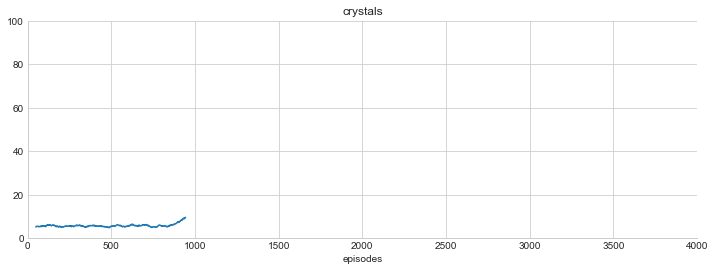

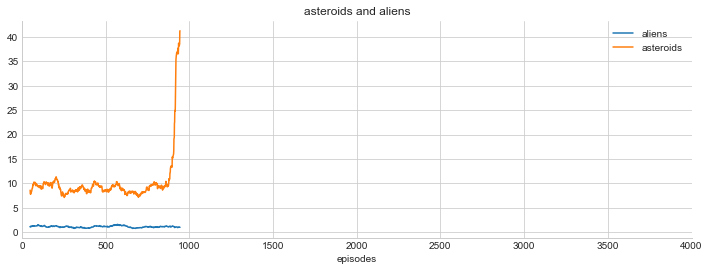

In [160]:
folder = 'cq_gr_truth2'
plot_features(folder,which=0)

               
                 
### 'cq_gr_truth3/'

- positive points for running into asteroid (really silly check)
- gt_reward = np.array([2.0,-10.0,-10.0])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                  obs_type=3,relative_window=(25,25),
                 reward_func=reward_func)

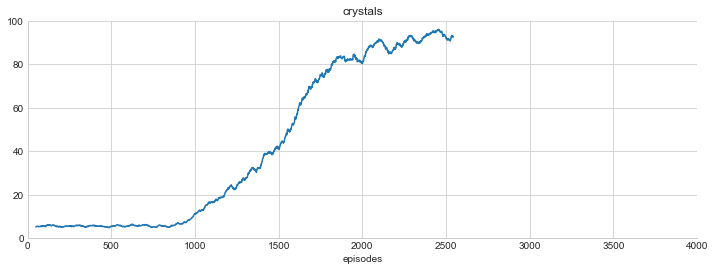

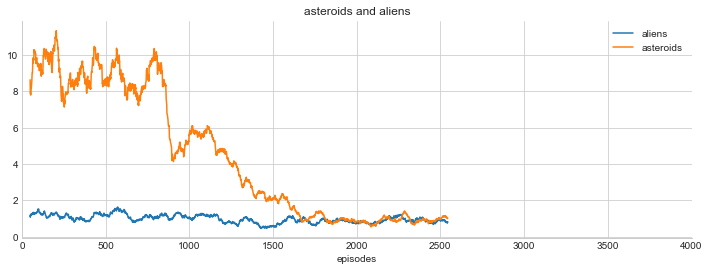

In [13]:
folder = 'cq_gr_truth3'
out = plot_features(folder,which=0)

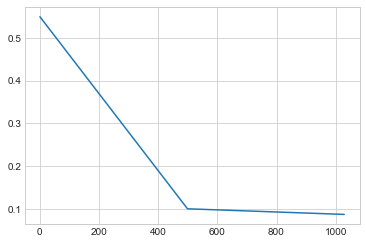

In [14]:
plt.plot(out['exploration'])

               
                 
### 'cq_gr_truth_smaller_network/'
- 3 conv layers (each smaller) and a smaller fully connected layer 
- gt_reward = np.array([2.0,-1.0,-1.0])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                  obs_type=3,relative_window=(25,25),
                 reward_func=reward_func)

{'exploration': array([ 0.9082  ,  0.9064  ,  0.9046  , ...,  0.077802,  0.07778 ,
         0.077758])}

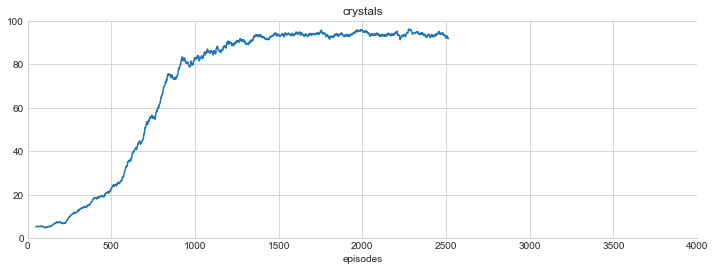

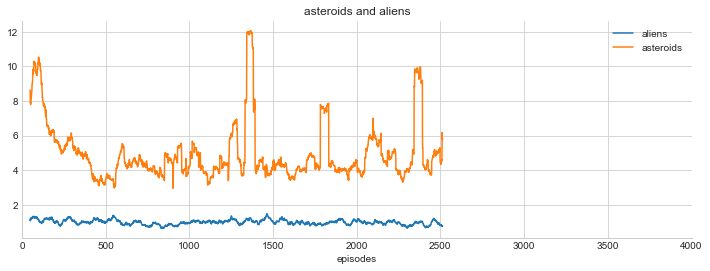

In [10]:
folder = 'cq_gr_truth_smaller_network'
plot_features(folder)

                              
### even smaller network
- 2 conv layers and an even smaller hidden layer. 
- gt_reward = np.array([2.0,-10.0,-10.0])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                  obs_type=3,relative_window=(25,25),
                 reward_func=reward_func)

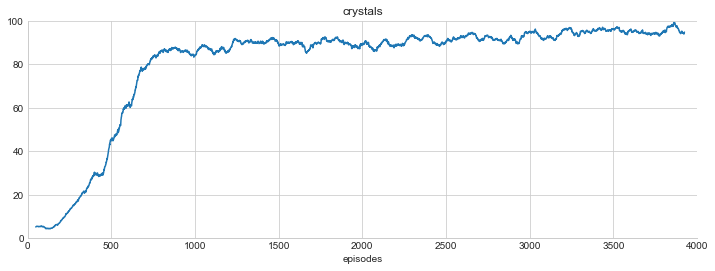

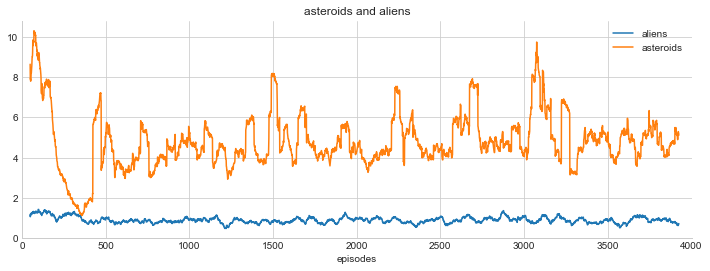

In [11]:
folder = 'cq_gr_truth_smaller_network2'
out = plot_features(folder)

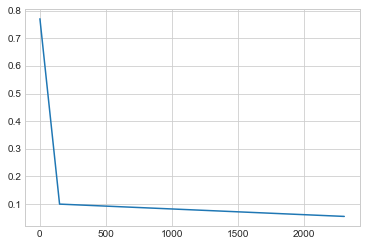

In [12]:
plt.plot(out['exploration'])

- so it takes about 750 episodes, which is about 250,000 times-steps to achieve good performance with the 
- the alien collisions goes down to about stays pretty constant at 1-2
- the assteroids stay pretty constant around 4. 
- really only explored for.
- but it may not get fully down to not bumping into asteroids.. 

### cq_gr_truth_new_setup

- gt_reward = np.array([2.0,-1.0,-1.0])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                  obs_type=3,relative_window=(25,25),
                 reward_func=reward_func)
                 
- conv_model_tiny
- exploration schedule (2e5, 0.1), # (1e6,0.1)
- 750,000 steps (1.5 hours) to get to (80,4) crystals
- probably need a lower exploration? 



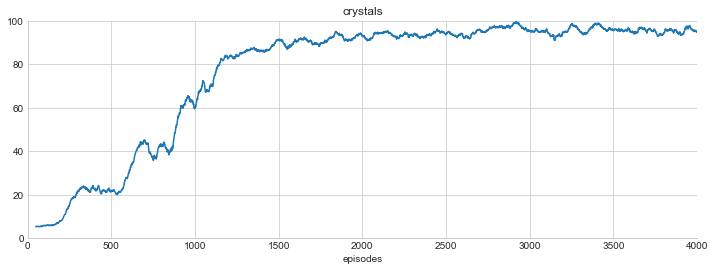

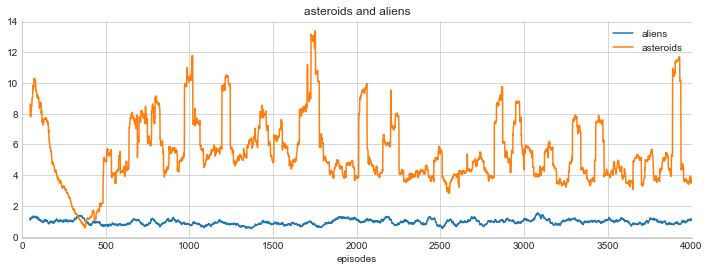

In [41]:
folder = 'cq_gr_truth_new_setup'
out = plot_features(folder)

- episode 1163 is about 1e6 timesteps

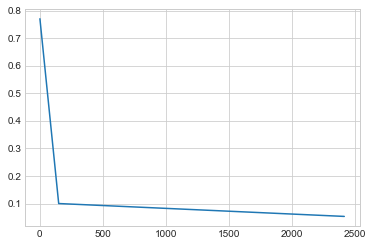

In [30]:
plt.plot(out['exploration'])

### cq_gr_truth_new_setup2

- gt_reward = np.array([2.0,-1.0,-1.0])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                  obs_type=3,relative_window=(25,25),
                 reward_func=reward_func,stochastic_actions=True)
                 
- conv_model_tiny
- exploration schedule (2e5, 0.1), # (1e6,0.1)




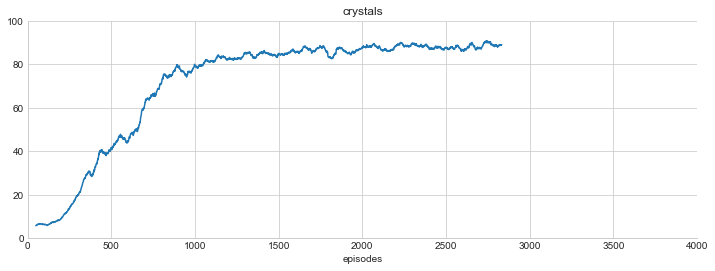

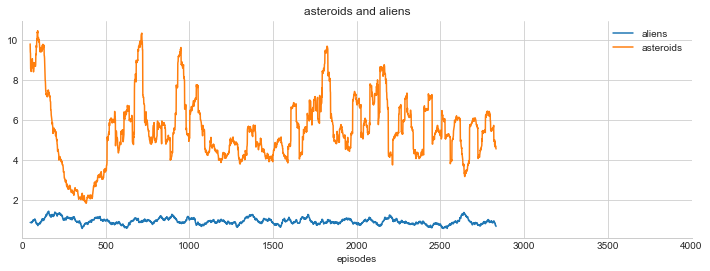

In [42]:
folder = 'cq_gr_truth_new_setup2'
out = plot_features(folder,which=0)

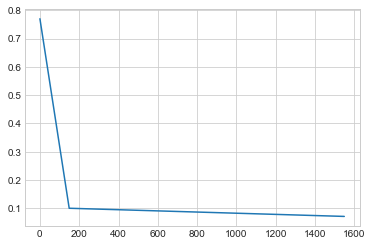

In [33]:
plt.plot(out['exploration'])

### cq_gr_truth_new_setup3

- gt_reward = np.array([10.0,-20.0,-20.0,0.05,0.05])
- env = cq.Wave1Env(num_aliens=2,num_crystals=20,num_asteroids=20,
                      obs_type=3,relative_window=(25,25),
                     reward_func=reward_func,features=['crystal_captured',
                        'asteroid_collision',
                        'alien_collision',
                      'dist_closest_asteroid',
                     'dist_closest_alien'])

- reward_func = LinearRewardFunction(session,num_features=5)                 
- conv_model_tiny
- exploration schedule (2e5, 0.1), # (1e6,0.1)




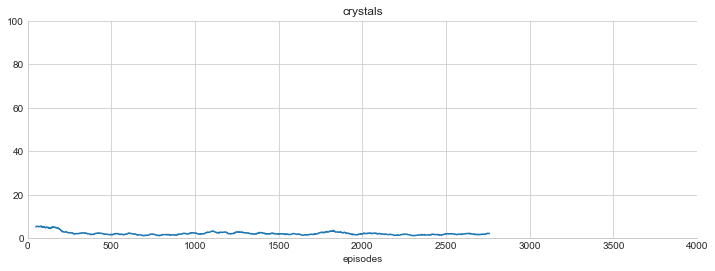

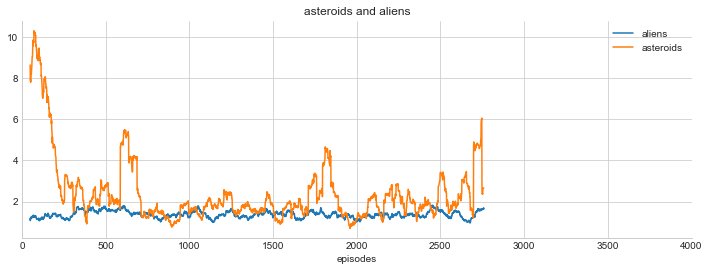

In [43]:
folder = 'cq_gr_truth_new_setup3'
out = plot_features(folder,which=0)

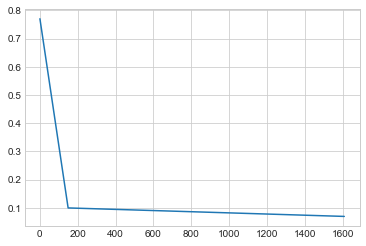

In [44]:
plt.plot(out['exploration'])

### ...

reward of 10.0,0,0 v 1,-50.0,-50.0




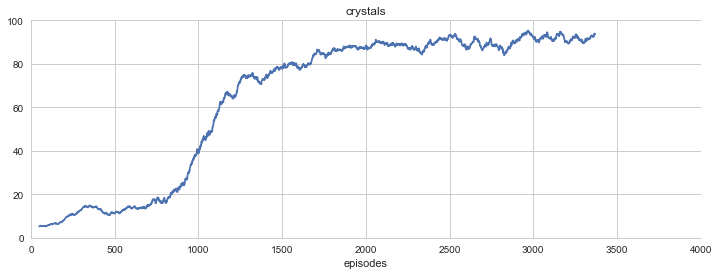

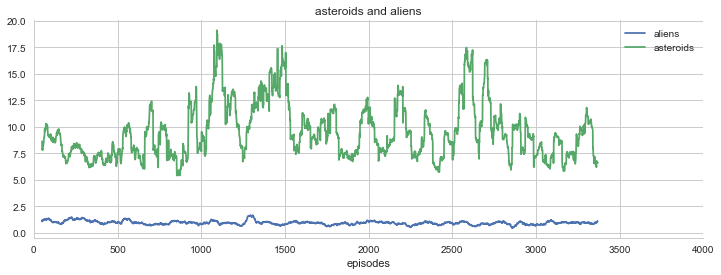

In [11]:
folder = 'cq_gr_truth_more_choice_noise3'
out = plot_features(folder,which=0)


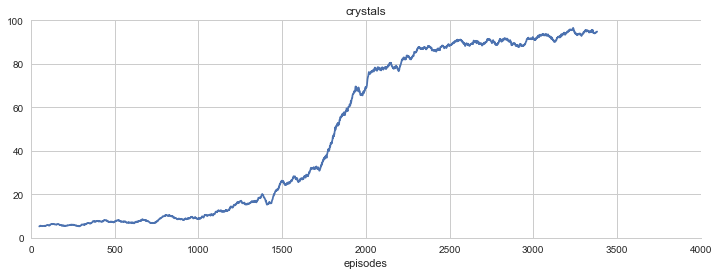

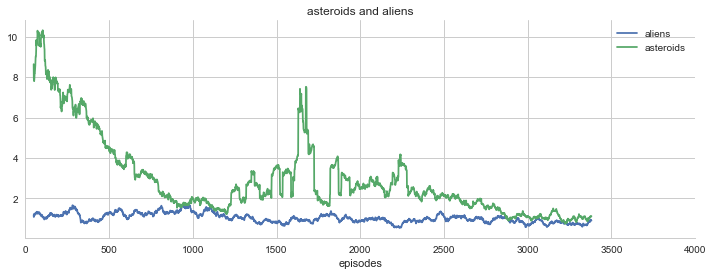

In [10]:
folder = 'cq_gr_truth_more_choice_noise4'
out = plot_features(folder,which=0)


### Soft optimality Q-learning
- at a certain point the q-values don't sum to 1 and it chooses randomly, hence the catesptrophic failure below. 

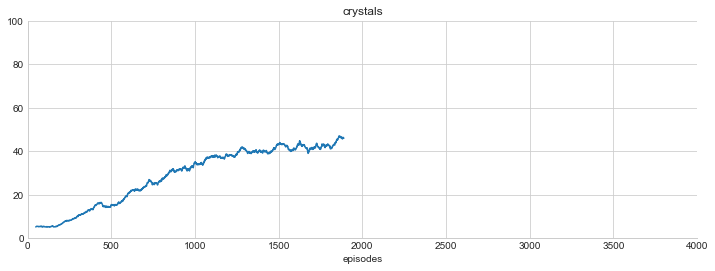

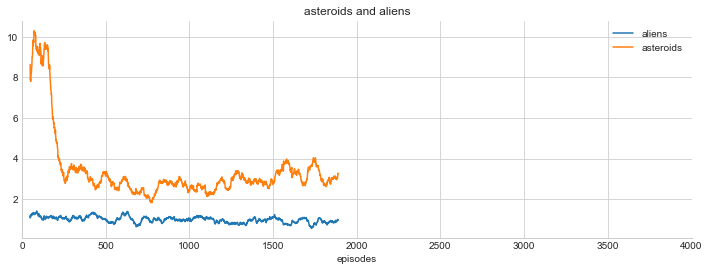

In [7]:
folder = 'cq_gr_truth_more_choice_noise5_softmax'
folder = 'test'
out = plot_features(folder,which=0)

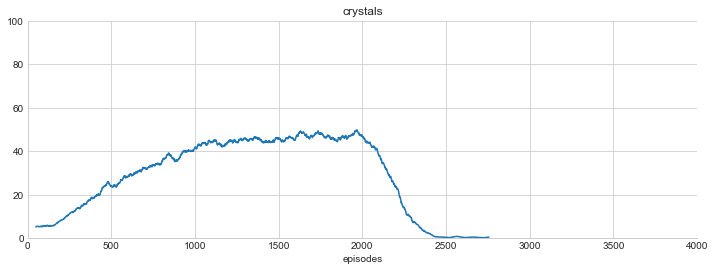

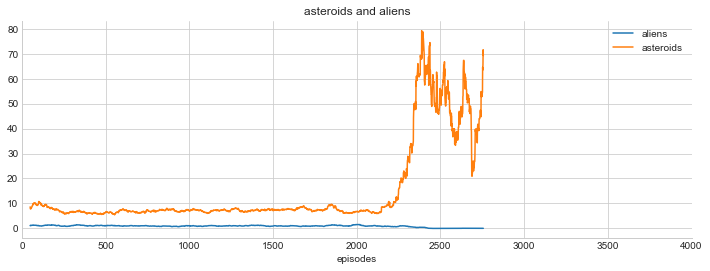

In [10]:
folder = 'cq_gr_truth_more_choice_noise5_softmax'
#folder = 'test'
out = plot_features(folder,which=1)

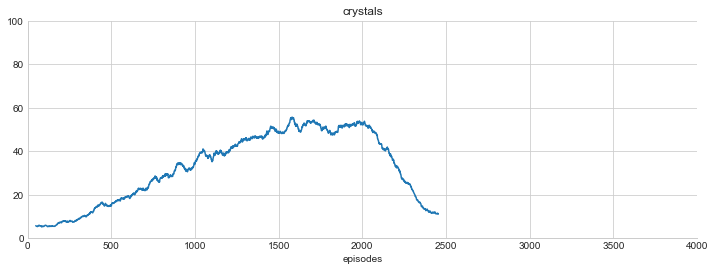

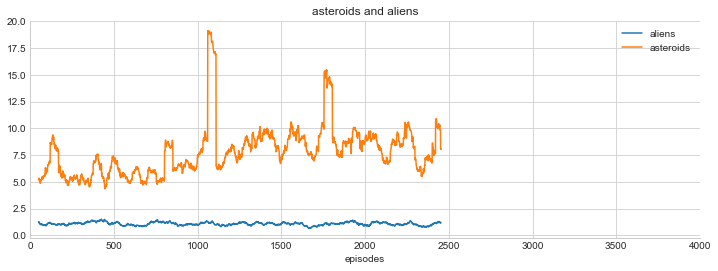

In [13]:
folder = 'cq_gr_truth_clustering_and_10p_choice_noise_softmax'
# BUT I Don't think there are actually stochastic actions 
out = plot_features(folder,which=1)

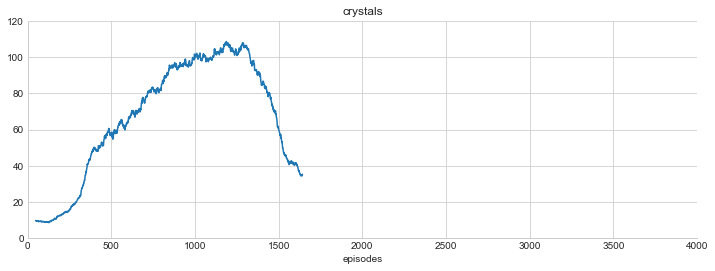

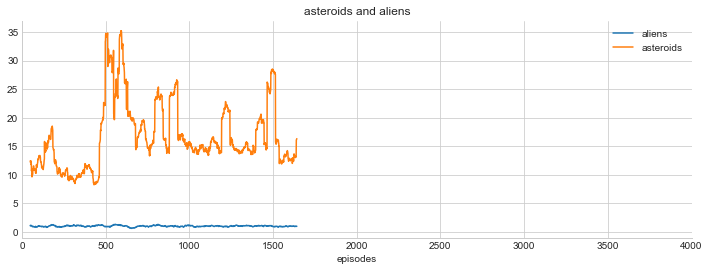

In [26]:
folder = 'cq_grt_risky_clust1.5_and_10p_cn10_soft_tiny'
out = plot_features(folder,which=0,ylim=[0,120])

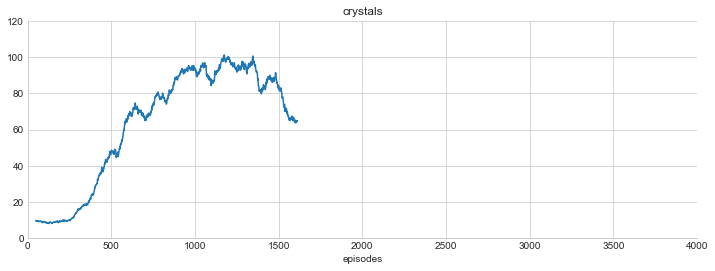

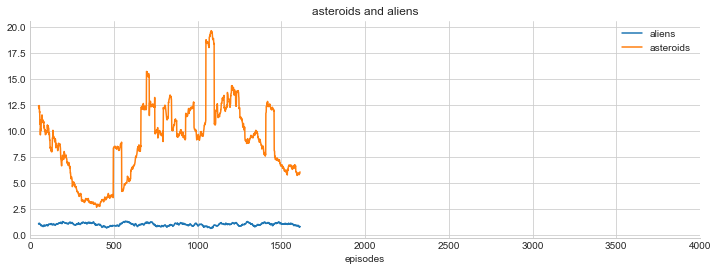

In [27]:
folder = 'cq_grt_safe_clust1.5_and_10p_cn10_soft_tiny/'
out = plot_features(folder,which=0,ylim=[0,120])

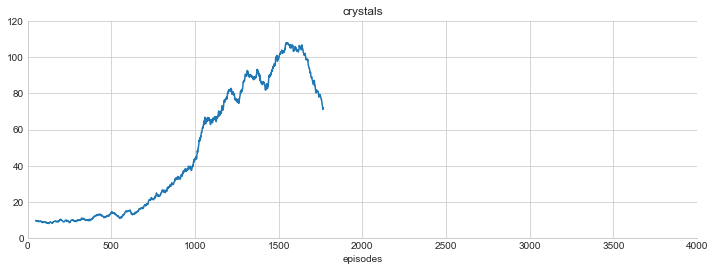

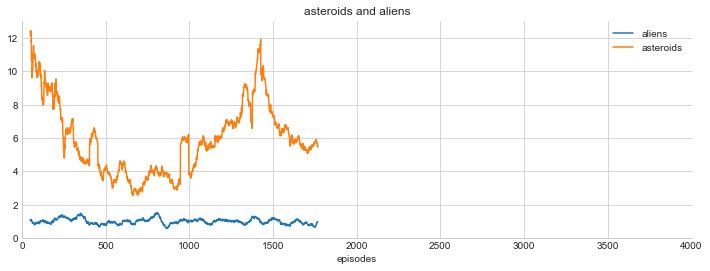

In [37]:
folder = 'cq_grt_safer_clust1.5_and_10p_cn10_soft_tiny/'
out = plot_features(folder,which=1,ylim=[0,120])

- discovered that these failures were due to overflow on the Q-values due to the Boltzman backups. Doing regular max backups solved this. 

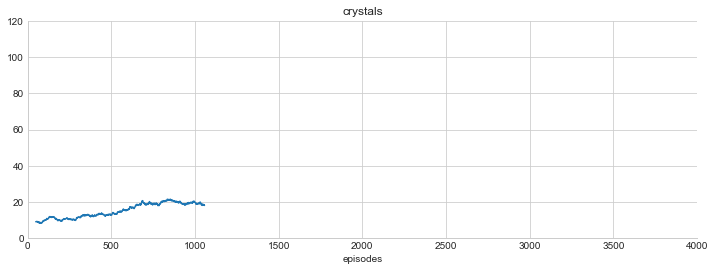

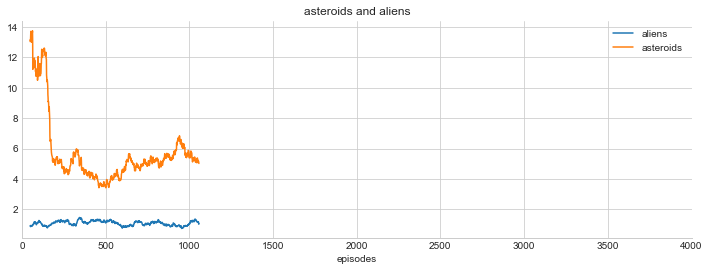

In [43]:
folder = 'cq_grt_safer_clust1.5_and_10p_cn15_soft_tiny/'
out = plot_features(folder,which=0,ylim=[0,120])

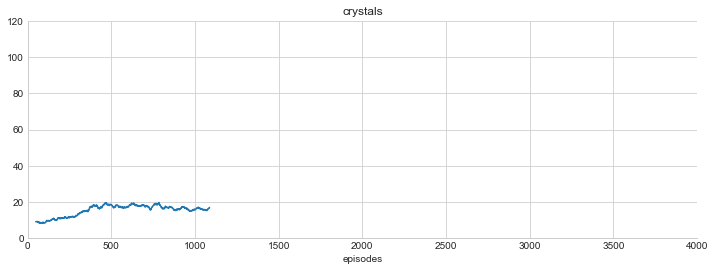

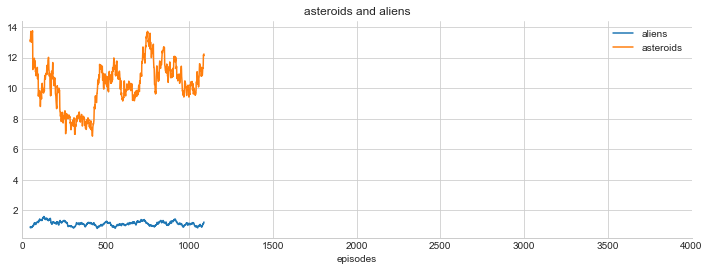

In [44]:
folder = 'cq_grt_risky_clust1.5_and_10p_cn15_soft_tiny/'
out = plot_features(folder,which=0,ylim=[0,120])

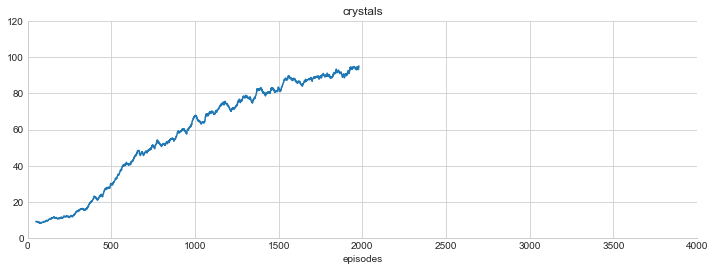

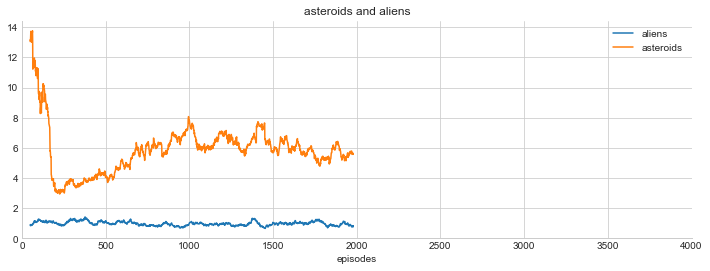

In [113]:
folder = 'cq_grt_safer_clust1.5_cn15_tiny_tmp0.1/'
out = plot_features(folder,which=0,ylim=[0,120])

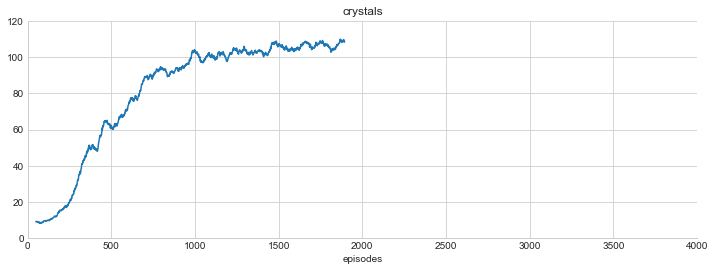

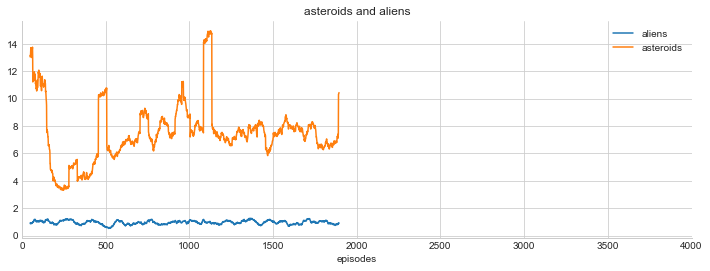

In [92]:
folder = 'cq_grt_risky_clust1.5_cn15_tiny_tmp0.1/'
out = plot_features(folder,which=0,ylim=[0,120])

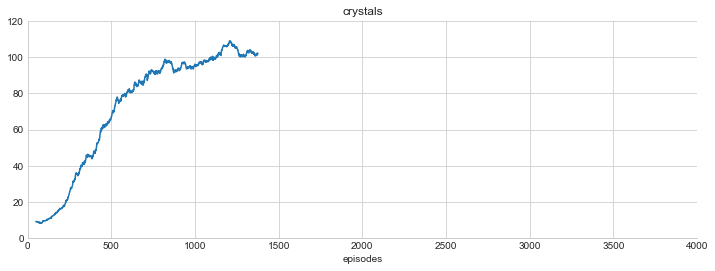

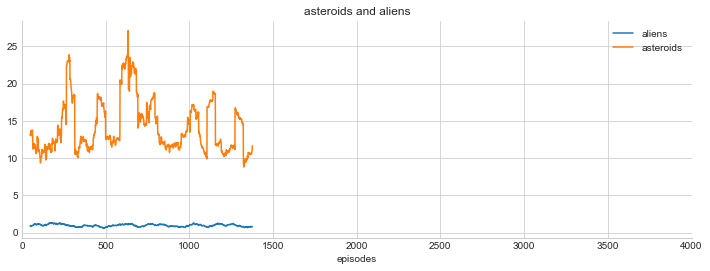

In [110]:
folder = 'cq_grt_riskier_clust1.5_cn15_tiny_tmp0.1/'
out = plot_features(folder,which=0,ylim=[0,120])

## Shorter Episodes (100 Steps)

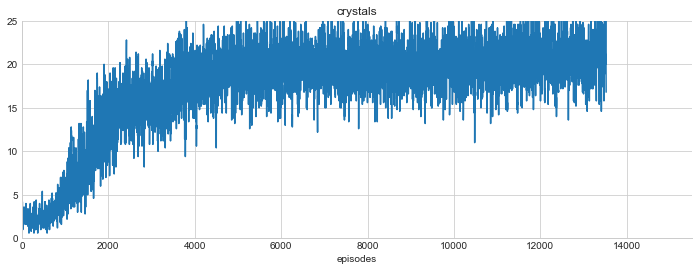

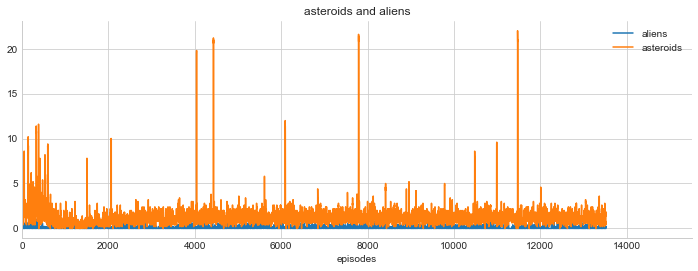

In [127]:
folder = 'cq_grt_neut_clust1.5_cn15_tiny_tmp0.1_100steps/'
out = plot_features(folder,which=1,xlim=[0,15500],ylim=[0,25])

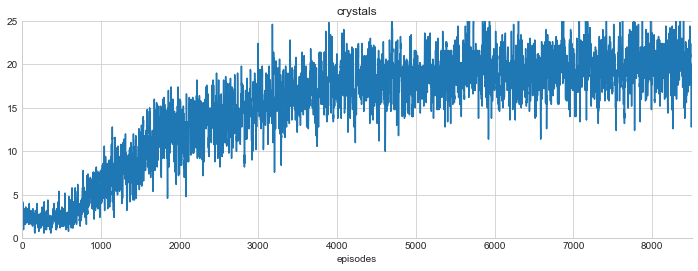

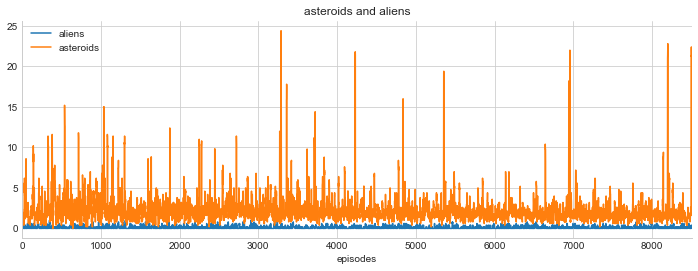

In [145]:
folder = 'cq_grt_riskier_clust1.5_cn15_tiny_tmp0.1_100steps/'
out = plot_features(folder,which=0,xlim=[0,8500],ylim=[0,25])

In [147]:
print(out['crystals'][-1000:].mean())
print(out['crystals'][-1000:].std())
print(out['asteroids'][-1000:].mean())
print(out['asteroids'][-1000:].std())

20.443
5.42924957982
2.482
5.4700709319


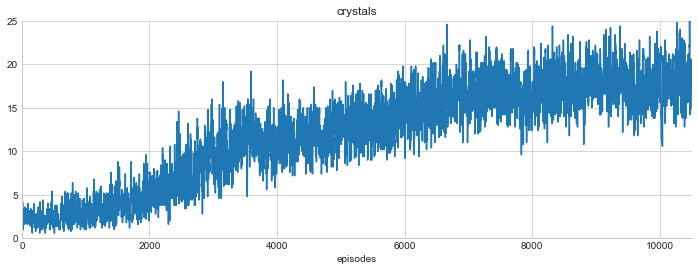

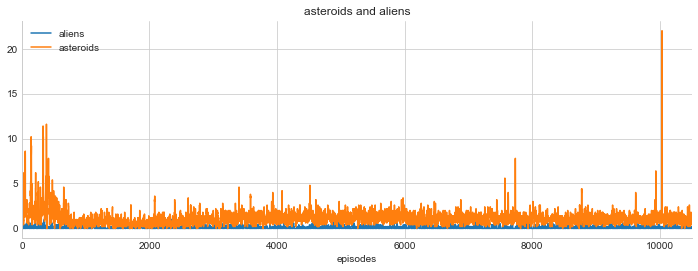

In [149]:
folder = 'cq_grt_safer_clust1.5_cn15_tiny_tmp0.1_100steps/'
out = plot_features(folder,which=0,xlim=[0,10500],ylim=[0,25])

In [150]:
print(out['crystals'][-1000:].mean())
print(out['crystals'][-1000:].std())
print(out['asteroids'][-1000:].mean())
print(out['asteroids'][-1000:].std())

18.136
5.04910922837
1.127
1.0737183057


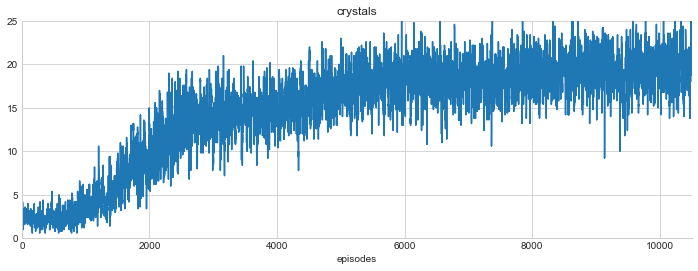

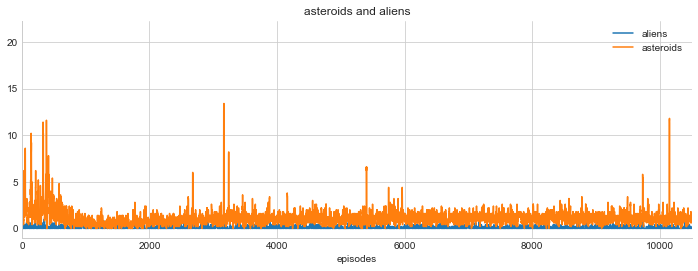

In [151]:
folder = 'cq_grt_safer_wneg3_clust1.5_cn15_tiny_tmp0.1_100steps/'
out = plot_features(folder,which=0,xlim=[0,10500],ylim=[0,25])

In [152]:
print(out['crystals'][-1000:].mean())
print(out['crystals'][-1000:].std())
print(out['asteroids'][-1000:].mean())
print(out['asteroids'][-1000:].std())

20.287
5.19024382857
1.161
3.33812507255
